In [21]:
# importing sql module and pandas
import sqlite3
import pandas as pd

# defining function to run queries with context manager
def run_query(query):
    with sqlite3.connect('chinook.db') as conn:
        return pd.read_sql(query, conn)
    
# function to CREATE VIEW easily
def cmd(command):
    with sqlite3.connect('chinook.db') as conn:
        conn.isolation_level = None
        conn.execute(command)
    
# create function to list all tables in the db
def list_tables():
    query = """SELECT
                    name,
                    type
                FROM sqlite_master
                WHERE type IN ("table","view");"""
    return run_query(query)

Testing our functions one by one, starting with 'run query'

In [22]:
# testing run_query function
query = "SELECT * FROM invoice limit 5;"
run_query(query)

,invoice_id,customer_id,invoice_date,billing_address,billing_city,billing_state,billing_country,billing_postal_code,total
0,1,18,2017-01-03 00:00:00,627 Broadway,New York,NY,USA,10012-2612,15.84
1,2,30,2017-01-03 00:00:00,230 Elgin Street,Ottawa,ON,Canada,K2P 1L7,9.90
2,3,40,2017-01-05 00:00:00,"8, Rue Hanovre",Paris,None,France,75002,1.98
3,4,18,2017-01-06 00:00:00,627 Broadway,New York,NY,USA,10012-2612,7.92
4,5,27,2017-01-07 00:00:00,1033 N Park Ave,Tucson,AZ,USA,85719,16.83


In [23]:
#  testing create_view function

command = """CREATE VIEW IF NOT EXISTS test AS
            SELECT * FROM track LIMIT 10;"""

cmd(command)

# testing to see if view is created
run_query("SELECT * FROM test;")

,track_id,name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price
0,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99
5,6,Put The Finger On You,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",205662,6713451,0.99
6,7,Let's Get It Up,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",233926,7636561,0.99
7,8,Inject The Venom,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",210834,6852860,0.99
8,9,Snowballed,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",203102,6599424,0.99
9,10,Evil Walks,1,1,1,"Angus Young, Malcolm Young, Brian Johnson",263497,8611245,0.99


In [24]:
# testing list_tables function
list_tables()

,name,type
0,album,table
1,artist,table
2,customer,table
3,employee,table
4,genre,table
5,invoice,table
6,invoice_line,table
7,media_type,table
8,playlist,table
9,playlist_track,table


In [25]:
# finding out which genres sell the most tracks in absolute numbers

query = """
        SELECT g.name AS genre,
               COUNT(*) AS tracks_sold
        FROM invoice_line il
        INNER JOIN track t on t.track_id = il.track_id
        INNER JOIN genre g on g.genre_id = t.genre_id
        INNER JOIN invoice i on i.invoice_id = il.invoice_id
        WHERE i.billing_country='USA'
        GROUP BY 1
        ORDER BY 2 DESC;
        """
top_genres = run_query(query)
top_genres

,genre,tracks_sold
0,Rock,561
1,Alternative & Punk,130
2,Metal,124
3,R&B/Soul,53
4,Blues,36
5,Alternative,35
6,Latin,22
7,Pop,22
8,Hip Hop/Rap,20
9,Jazz,14


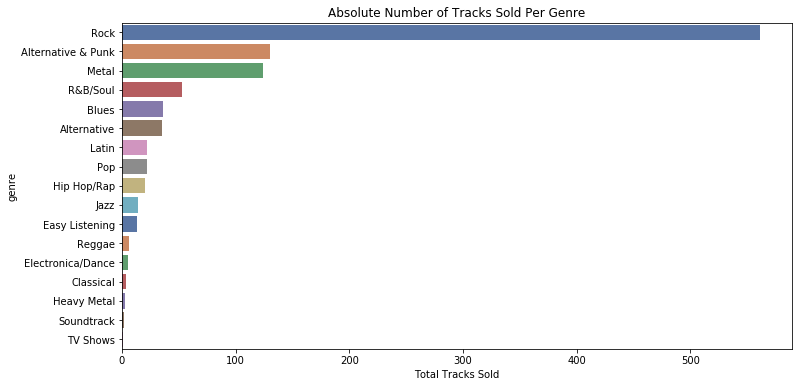

In [26]:
# graphing top genres in absolute numbers
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(12,6))
sns.barplot(data=top_genres, x='tracks_sold', y='genre', palette='deep')
plt.title("Absolute Number of Tracks Sold Per Genre")
plt.xlabel("Total Tracks Sold")
plt.show()

In [40]:
# finding out which genres sell the most tracks in percentages

query = """
        SELECT g.name AS genre,
               (COUNT(*) * 1.0) / ((SELECT COUNT(*) FROM invoice_line il
                                    INNER JOIN invoice i on i.invoice_id = il.invoice_id
                                    WHERE i.billing_country = "USA") * 1.0) * 100 AS tracks_sold 
        FROM invoice_line il
        INNER JOIN track t on t.track_id = il.track_id
        INNER JOIN genre g on g.genre_id = t.genre_id
        INNER JOIN invoice i on i.invoice_id = il.invoice_id
        WHERE i.billing_country='USA'
        GROUP BY 1
        ORDER BY 2 DESC;
        """
top_genres_pct = run_query(query)
top_genres_pct

,genre,tracks_sold
0,Rock,53.377735
1,Alternative & Punk,12.369172
2,Metal,11.798287
3,R&B/Soul,5.042816
4,Blues,3.425309
5,Alternative,3.330162
6,Latin,2.093245
7,Pop,2.093245
8,Hip Hop/Rap,1.902950
9,Jazz,1.332065


<IPython.core.display.Javascript object>


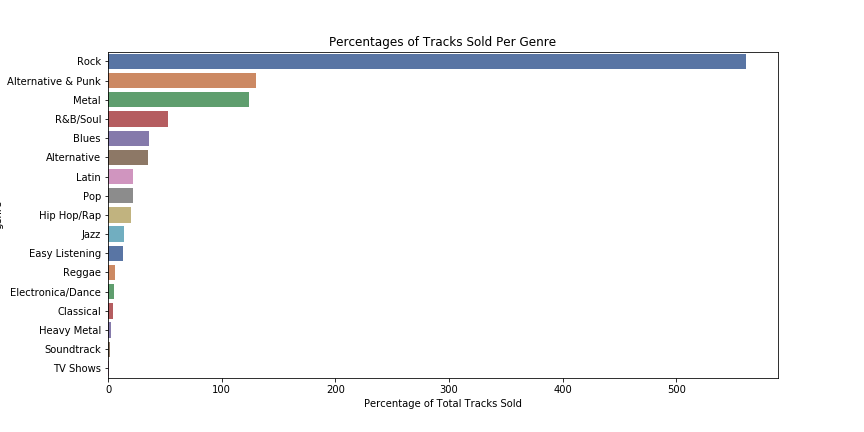

In [41]:
# graphing top genres in Percentages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib nbagg

plt.figure(figsize=(12,6))
sns.barplot(data=top_genres, x='tracks_sold', y='genre', palette='deep')
plt.title("Percentages of Tracks Sold Per Genre")
plt.xlabel("Percentage of Total Tracks Sold")
plt.show()

Since Punk is the highest selling genre out of:

- Hip-Hop
- Punk
- Pop
- Blues

We think it would be best to sign the band "Red Tone" first.  Since blues is the next genre down the list, we should sign "Slim Jim Bites" next.  Pop is slightly higher selling of a genre for our company, so our last signing should be "Meteor and the Girls."



In [42]:
query = """
            SELECT * FROM employee limit 5;
            

"""

run_query(query)

,employee_id,last_name,first_name,title,reports_to,birthdate,hire_date,address,city,state,country,postal_code,phone,fax,email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2016-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2016-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2017-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2017-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2017-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


In [43]:
# performance of easch sales support agent
# starting by looking at total dollars sold per agent and the hiring date of each employee

query = """
            SELECT e.first_name || " " || e.last_name as employee_name,
            e.hire_date,
            SUM(i.total) as dollars_sold
            FROM employee e
            LEFT JOIN customer c on c.support_rep_id = e.employee_id
            LEFT JOIN invoice i on i.customer_id = c.customer_id
            WHERE e.title = 'Sales Support Agent'
            GROUP BY 1
            ORDER BY 1 ASC;
            

"""

run_query(query)

,employee_name,hire_date,dollars_sold
0,Jane Peacock,2017-04-01 00:00:00,1731.51
1,Margaret Park,2017-05-03 00:00:00,1584.00
2,Steve Johnson,2017-10-17 00:00:00,1393.92


There could be some burnout going on in the sales department since the employees with the least time on the job appear to be outperforming those that have been here longer.

In [44]:
# breaking down customer statists by country, not counting countries with only one customer

query = """
        SELECT i.billing_country AS country,
        COUNT(DISTINCT(c.customer_id)) AS num_customer,
        ROUND((SUM(i.total) * 1.0) / (COUNT(DISTINCT(c.customer_id)) * 1.0),2) AS avg_sale_per_cust,
        ROUND((SUM(i.total) * 1.0) / (COUNT(c.customer_id) * 1.0),2) AS avg_order_per_cust,
        SUM(total) AS total_sales,
        CASE WHEN COUNT(DISTINCT(c.customer_id)) < 2 THEN 0
             ELSE 1
             END AS meets_criteria
        FROM invoice i
        LEFT JOIN customer c on i.customer_id = c.customer_id
        GROUP BY 1
        HAVING meets_criteria = 1
        ORDER BY 5 DESC;
        
        """

c_cust_count = run_query(query)
c_cust_count

,country,num_customer,avg_sale_per_cust,avg_order_per_cust,total_sales,meets_criteria
0,USA,13,80.04,7.94,1040.49,1
1,Canada,8,66.95,7.05,535.59,1
2,Brazil,5,85.54,7.01,427.68,1
3,France,5,77.81,7.78,389.07,1
4,Germany,4,83.66,8.16,334.62,1
5,Czech Republic,2,136.62,9.11,273.24,1
6,United Kingdom,3,81.84,8.77,245.52,1
7,Portugal,2,92.57,6.38,185.13,1
8,India,2,91.58,8.72,183.15,1


<IPython.core.display.Javascript object>


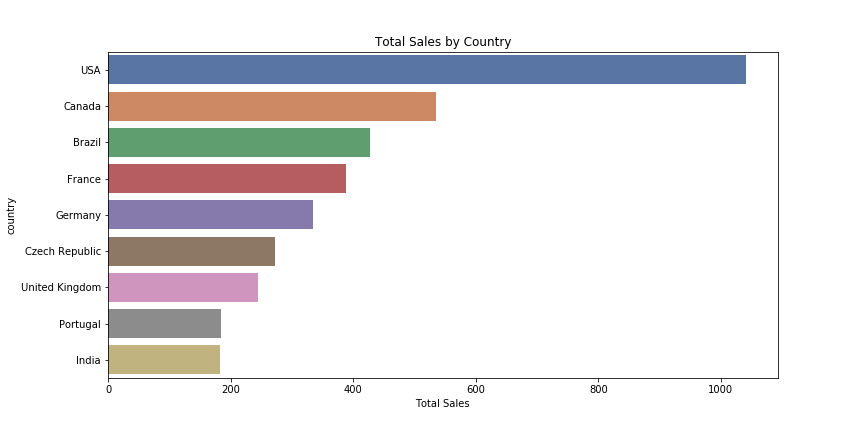

In [45]:
# graphing total sales by country

plt.figure(figsize=(12,6))
sns.barplot(data=c_cust_count, x='total_sales', y='country', palette='deep')
plt.title("Total Sales by Country")
plt.xlabel("Total Sales")
plt.show()

<IPython.core.display.Javascript object>


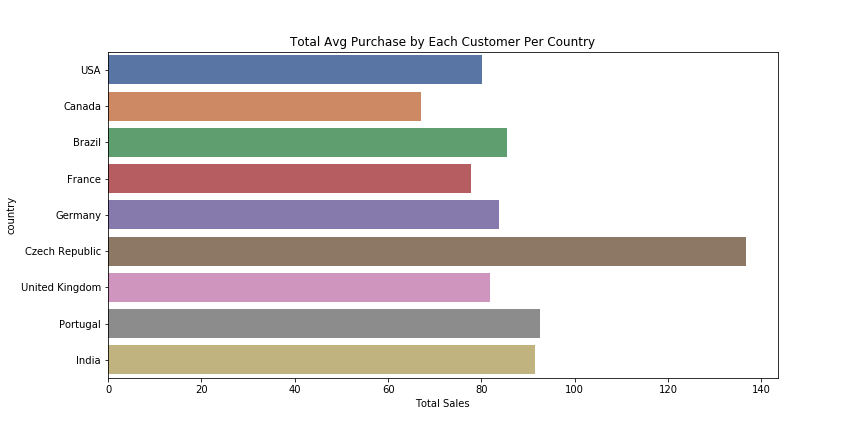

In [46]:
# graphing Average Sale Per Customer Per Country

plt.figure(figsize=(12,6))
sns.barplot(data=c_cust_count, x='avg_sale_per_cust', y='country', palette='deep')
plt.title("Total Avg Purchase by Each Customer Per Country")
plt.xlabel("Total Sales")
plt.show()

India, being a large country, has a lot of potential for growth.  Despite the small number of current customers, their average purchase size is relatively large, and the country is rapidly developing.  One concern might be the genre of music that the average Indian listens to.

Czech Republic has a small number of customers but their avg purchase size is large, so that could be another country we could branch out into.

Canada, do its similar tastes in music as the US could be another worthy target for our marketing dollars.

In [47]:
# breaking down customer statists by country, but ONLY countries with a single purchase
query = """
        SELECT i.billing_country AS country,
        COUNT(DISTINCT(c.customer_id)) AS num_customer,
        ROUND((SUM(i.total) * 1.0) / (COUNT(DISTINCT(c.customer_id)) * 1.0),2) AS avg_sale_per_cust,
        ROUND((SUM(i.total) * 1.0) / (COUNT(c.customer_id) * 1.0),2) AS avg_order_per_cust,
        SUM(total) AS total_sales,
        CASE WHEN COUNT(DISTINCT(c.customer_id)) < 2 THEN 0
             ELSE 1
             END AS meets_criteria
        FROM invoice i
        LEFT JOIN customer c on i.customer_id = c.customer_id
        GROUP BY 1
        HAVING meets_criteria = 0
        ORDER BY 5 DESC;
        
        """

other_count = run_query(query)
other_count

,country,num_customer,avg_sale_per_cust,avg_order_per_cust,total_sales,meets_criteria
0,Ireland,1,114.84,8.83,114.84,0
1,Spain,1,98.01,8.91,98.01,0
2,Chile,1,97.02,7.46,97.02,0
3,Australia,1,81.18,8.12,81.18,0
4,Finland,1,79.20,7.20,79.20,0
5,Hungary,1,78.21,7.82,78.21,0
6,Poland,1,76.23,7.62,76.23,0
7,Sweden,1,75.24,7.52,75.24,0
8,Norway,1,72.27,8.03,72.27,0
9,Austria,1,69.30,7.70,69.30,0


<IPython.core.display.Javascript object>


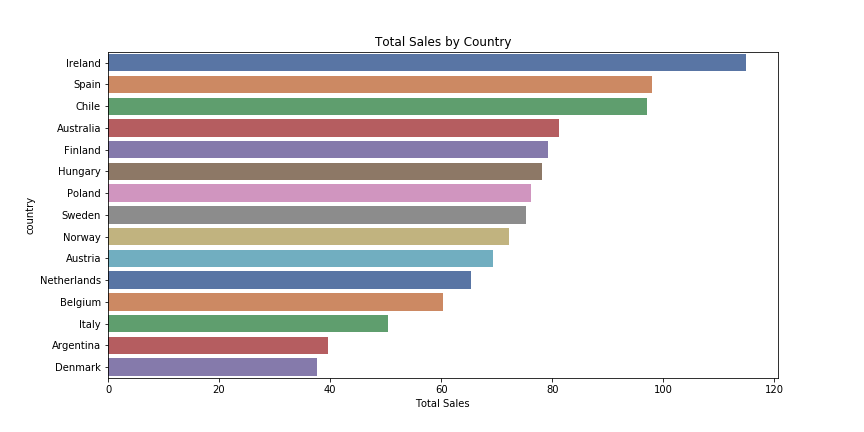

In [48]:
# graphing total sales by country

plt.figure(figsize=(12,6))
sns.barplot(data=other_count, x='total_sales', y='country', palette='deep')
plt.title("Total Sales by Country")
plt.xlabel("Total Sales")
plt.show()

With such a small sample size of customer(/s), not much can be drawn from this data, but updating this page every few months could yield potential leads on areas to target in the future.

Currently, the Chinook Music Store does not allow customers to get a discount by purchasing the entire album, forcing the customer to choose each track individually.

Management would like to know if customers are commonly purchasing only the popular tracks off an album rather than the entire thing.  This way, the Chinook Music Store could save money by only purchasing those popular tracks from the record companies.

Before making a decision, they would like to know what percentages of purchases are entire albums, vs individual tracks.

There are a few edge cases we need to account for when making our calculations.

1) If the customer purchases not only an entire album, but also additional tracks from other albums on the same purchase.

2) albums with only two tracks are likely to be purchased by a customer simply looking to purchase a few songs from a particular artist.  We will ignore all such cases.

In [62]:
# query categorizing each purchase as a album purchase or not
# include number of album purchaes and percentage of album purchases

query = """
        WITH album_song_counts AS
        (SELECT 
            al.album_id AS ASW_album_id,
            COUNT(DISTINCT(t.track_id)) as ASW_song_count
            FROM album al
            LEFT JOIN track t on t.album_id = al.album_id
            GROUP BY 1),
        
        grouped_once AS
        (SELECT 
            i.invoice_id,
            al.album_id,
            COUNT(DISTINCT(t.track_id)) AS tracks_purchased_from_each_album,
            asc.ASW_album_id,
            asc.ASW_song_count,
            CASE
                WHEN asc.ASW_song_count = COUNT(DISTINCT(t.track_id)) 
                AND ASW_song_count > 2 THEN 1
                ELSE 0
            END AS is_album_purchase
            FROM invoice i
            LEFT JOIN invoice_line il ON il.invoice_id = i.invoice_id
            LEFT JOIN track t on t.track_id = il.track_id
            LEFT JOIN album al on al.album_id = t.album_id
            LEFT JOIN album_song_counts asc on asc.ASW_album_id = al.album_id
            GROUP BY 1,2),
        
        final_group AS
        (SELECT 
            invoice_id,
            MAX(is_album_purchase) AS album_or_not
        FROM grouped_once
        GROUP BY 1)
        
        SELECT
                (SELECT
                COUNT(*) 
                FROM final_group 
                WHERE album_or_not = 1) AS total_album_sales,
                
                (SELECT
                COUNT(*) 
                FROM final_group 
                WHERE album_or_not = 0) AS total_non_album_sales,
                
                ((SELECT
                COUNT(*) 
                FROM final_group 
                WHERE album_or_not = 1)*1.0)
                /
                ((SELECT
                COUNT(*) 
                FROM final_group)*1.0) * 100 AS album_purchase_pct,
                
                ((SELECT
                COUNT(*) 
                FROM final_group 
                WHERE album_or_not = 0)*1.0)
                /
                ((SELECT
                COUNT(*) 
                FROM final_group)*1.0) * 100 AS not_album_purchase_pct
                ;
         
        """

run_query(query)

,total_album_sales,total_non_album_sales,album_purchase_pct,not_album_purchase_pct
0,111,503,18.078176,81.921824


In [51]:
pd.set_option('display.max_rows', 500)



query = """
        WITH album_song_counts AS
        (SELECT 
            al.album_id AS ASW_album_id,
            COUNT(DISTINCT(t.track_id)) as ASW_song_count
            FROM album al
            LEFT JOIN track t on t.album_id = al.album_id
            GROUP BY 1
            HAVING ASW_song_count > 2),
        
        grouped_once AS
        (SELECT 
            i.invoice_id,
            al.album_id,
            COUNT(DISTINCT(t.track_id)) AS num_tracks_from_each_album,
            asc.ASW_album_id,
            asc.ASW_song_count,
            CASE
                WHEN asc.ASW_song_count = COUNT(DISTINCT(t.track_id)) THEN 1
                ELSE 0
            END AS is_album_purchase
            FROM invoice i
            LEFT JOIN invoice_line il ON il.invoice_id = i.invoice_id
            LEFT JOIN track t on t.track_id = il.track_id
            LEFT JOIN album al on al.album_id = t.album_id
            LEFT JOIN album_song_counts asc on asc.ASW_album_id = al.album_id
            GROUP BY 1,2),
            
            final_group AS
            (SELECT 
                invoice_id,
                MAX(is_album_purchase) AS album_or_not
            FROM grouped_once
            GROUP BY 1)
            
            SELECT * FROM final_group;
            
            
        """
        
run_query(query)
            
        

,invoice_id,album_or_not
0,1,1
1,2,0
2,3,0
3,4,0
4,5,1
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [38]:
query = """
    SELECT 
    al.album_id,
    COUNT(DISTINCT(t.track_id))
    FROM album al
    INNER JOIN track t on t.album_id = al.album_id
    INNER JOIN invoice_line il on il.track_id = t.track_id
    INNER JOIN invoice i on i.invoice_id = il.invoice_id
    WHERE al.album_id = 88
    GROUP BY 1;
    
"""

run_query(query)

,album_id,COUNT(DISTINCT(t.track_id))
0,88,12


In [39]:
query = """
    SELECT 
    count(*)
    FROM invoice;
    
"""

run_query(query)

,count(*)
0,614
